<p style="text-align: center"><font size="7"> TP2 </font></p> 

<p style="text-align: center"><font size="5"> Guines Antoine / Langolff Clément </font></p> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import time

## Exercice 1 : Implémentation de méthode de Runge-Kutta

### Méthode de Runge-Kutta 2

1- Calcul de l'ordre des méthodes :
Pour montrer que $RK2_{\alpha}$ est d'ordre 2 pour tout $\alpha$,
on utilise le tableau de Butcher. 

Tout d'abord la méthode est consistante d'ordre 1 car $\sum_{j=1}^{r}c_{j}=1$. 

Ensuite on se place ici dans le cas où $\sum_{k=1}^{r}a_{jk}=\theta_{j}$.
Ainsi il suffit de montrer que :
$$
\sum_{j=1}^{r}c_{j}\theta_{j}=\frac{1}{2}
$$

En faisant le calcul à partir du tableau, on obtient que :
$$
\sum_{j=1}^{2}c_{j}\theta_{j}=0\times(1-\frac{1}{2\alpha})+\alpha\times\frac{1}{2\alpha}=\frac{1}{2}
$$

Donc la méthode est bien d'ordre 2 pour tout $\alpha$. 

Pour montrer que $RK4$ est d'ordre 4, on calcul successivement les
dérivés de sorte que l'on ait $\forall p\in\{0,..3\}$ :
$$
\frac{\partial^{p}F(t,y,0)}{\partial^{p}h}=\frac{1}{p}f^{[p]}(t,y)
$$

Cela nous permet alors de montrer que l'ordre de la méthode est 4.

In [2]:
alpha = 1.

def RK2(f, Y0, t, alpha): 
    d = len(Y0)
    n = len(t)
    Y = np.zeros((d,n))
    Y[:,0] = Y0
    dt = t[1] - t[0]
    
    w2 = 0.5 / alpha
    w1 = 1 - w2 
    alphadt = alpha * dt
    for i in range(n-1) :
        K1 = f(Y[:,i], t[i])
        K2 = f(Y[:,i] + alphadt * K1, t[i] + alphadt)
        Y[:,i+1] = Y[:,i] + dt * (w1 * K1 + w2 * K2 )
    
    return Y
    

### Méthode de Runge-Kutta 4

In [3]:
def RK4(f, Y0, t) : 
   
    d = len(Y0)
    n = len(t)
    Y = np.zeros((d,n))
    Y[:,0] = Y0
    dt = t[1] - t[0]
    dt_div2 = dt * 0.5 
    dt_div6 = dt / 6
    for i in range(n-1) :
        K1 = f(Y[:,i], t[i])
        K2 = f(Y[:,i] + dt_div2 * K1, t[i] + dt_div2)
        K3 = f(Y[:,i] + dt_div2 * K2, t[i] + dt_div2)
        K4 = f(Y[:,i] + dt * K3, t[i] + dt)
        
        Y[:,i+1] = Y[:,i] + dt_div6 * (K1 + 2 * K2 + 2 * K3 + K4)
        
    return Y

### Euler explicite

In [4]:
def euler_explicite(f, y0, t):
        d = len(y0)
        n = len(t)
        y = np.zeros((d,n))
        y[:,0] = y0
        
        dt = t[1] - t[0]
        
        for i in range(n-1):
            y[:,i+1] = y[:,i] + dt * f(y[:,i],t[i])
            
        return y

### Euler implicite

La méthode d'Euler nécessite de résoudre un système pour trouver les coordonées du point suivant.
On dispose de l'application définit par la matrice M : 
$$\begin{align*}
f(t,x) & =Mx(t)\\
 & =\left[\begin{matrix}0 & -1\\
1 & 0
\end{matrix}\right]\left[\begin{matrix}x_{1}(t)\\
y_{1}(t)
\end{matrix}\right]
\end{align*}
$$
On résout alors :
$$
\begin{align*}
y_{i+1} & =y_{i}+hMy_{i+1}\\
\iff y_{i+1} &=y_{i}(I_{2}-hM)^{-1}
\end{align*}
$$

In [5]:
def euler_implicite(M, y0, t):
        d = len(y0)
        n = len(t)
        y = np.zeros((d,n))
        y[:,0] = y0
        dt = t[1] - t[0]
        A = np.linalg.inv(np.eye(2) - dt * M)
        
        for i in range(n-1):
            y[:,i+1] = np.matmul(A, y[:,i])
            
        return y

In [6]:
def dynamique1(Y,t) :
    X1, X2 = Y
    
    return np.array([-X2, X1])

2- Calcul explicite de la solution de l'EDO :
$$M=\left[\begin{matrix}0 & -1\\
1 & 0
\end{matrix}\right]$$  
$det(M-\lambda I_{d})=\lambda^{2}+1$ donc on dispose de 2 valeurs
propres imaginaires pures $\lambda_{1/2}=\pm i$  
$\left[\begin{matrix}x\\
y
\end{matrix}\right]\in ker(M-\lambda_{1}I_{d})\iff\begin{cases}
ix-y & =0\\
x+iy & =0
\end{cases}$ ces équations sont identiques. Donc $vect(E_{\lambda_{1}})=\mathbb{R}\left[\begin{matrix}1\\
i
\end{matrix}\right]$. De même $vect(E_{\lambda_{2}})=\mathbb{R}\left[\begin{matrix}1\\
-i
\end{matrix}\right]$


On pose alors $P=\left[\begin{matrix}1 & 1\\
i & -i
\end{matrix}\right]$ et $D=\left[\begin{matrix}-i & 0\\
0 & i
\end{matrix}\right]$


La solution exacte est donnée par
$
X(t)=Pe^{Dt}P^{-1}X(0)
$

$$
\begin{align*}
X(t) & =\left[\begin{matrix}1 & 1\\
i & -i
\end{matrix}\right]\left[\begin{matrix}e^{-it} & 0\\
0 & e^{it}
\end{matrix}\right]\frac{-1}{2i}\left[\begin{matrix}-i & -1\\
-i & 1
\end{matrix}\right]\left[\begin{matrix}x_{o}\\
y_{0}
\end{matrix}\right]\\
 & =\left[\begin{matrix}e^{-it} & e^{it}\\
ie^{-it} & -ie^{it}
\end{matrix}\right]\frac{-1}{2i}\left[\begin{matrix}-ix_{0}-y_{0}\\
-ix_{0}+y_{0}
\end{matrix}\right]\\
 & =\frac{-1}{2i}\left[\begin{matrix}(-ix_{0}-y_{0})e^{-it}+e^{it}(-ix_{0}+y_{0})\\
ie^{-it}(-ix_{0}-y_{0})-ie^{it}(-ix_{0}+y_{0})
\end{matrix}\right]\\
 & =\frac{-1}{2i}\left[\begin{matrix}-ix_{0}(e^{-it}+e^{it})+y_{0}(e^{it}-e^{-it})\\
-x_{0}(e^{it}-e^{-it})-iy_{0}(e^{it}+e^{-it})
\end{matrix}\right]\\
 & =\left[\begin{matrix}x_{0}cos(t)-y_{0}sin(t)\\
x_{0}sin(t)+y_{0}cos(t)
\end{matrix}\right]\\
 & =\left[\begin{matrix}cos(t) & -sin(t)\\
sin(t) & cos(t)
\end{matrix}\right]\left[\begin{matrix}x_{0}\\
y_{0}
\end{matrix}\right]
\end{align*}
$$  
c'est une matrice de rotation

In [7]:
def X(t) :
    return np.array([x0 * np.cos(t) - y0 * np.sin(t),x0 * np.sin(t) + y0 * np.cos(t)]) 

On genère un premier test pour $N=100$

In [8]:
N = 100
T = 10
M = np.array([[0,-1],
              [1,0]])

#conditions initiales
x0 = 1.
y0 = 0.
X0 = np.array([x0,y0])


temps = np.linspace(0,T,N+1)


#calcul des solutions 
tps1 = time.time()
EE = euler_explicite(dynamique1, X0, temps)
tps2 = time.time()
tpsEE = tps2 - tps1

tps1 = time.time()
EI = euler_implicite(M, X0, temps)
tps2 = time.time()
tpsEI = tps2 - tps1

tps1 = time.time()
rk2 = RK2(dynamique1, X0, temps,alpha)
tps2 = time.time()
tpsRK2 = tps2 - tps1

solExacte = X(temps)

In [9]:
#récuperation des coordonnées x1 et x2
X1EE = EE[0,:]
X2EE = EE[1,:]

X1EI = EI[0,:]
X2EI = EI[1,:]

X1RK2 = rk2[0,:]
X2RK2 = rk2[1,:]

X1solExact = solExacte[0,:]
X2solExact = solExacte[1,:]

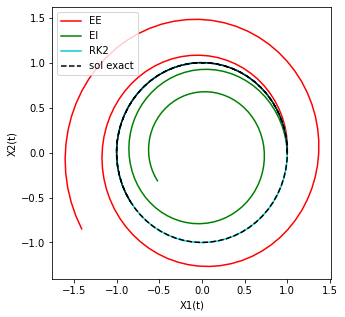

In [10]:
plt.figure(figsize=(5,5))
plt.plot(X1EE,X2EE,'r-',label='EE')
plt.plot(X1EI,X2EI,'g-',label='EI')
plt.plot(X1RK2,X2RK2,'-',color='darkturquoise',label='RK2')
plt.plot(X1solExact,X2solExact,'k--',label='sol exact')

plt.legend(loc='upper left')
plt.xlabel("X1(t)")
plt.ylabel("X2(t)")
plt.show()

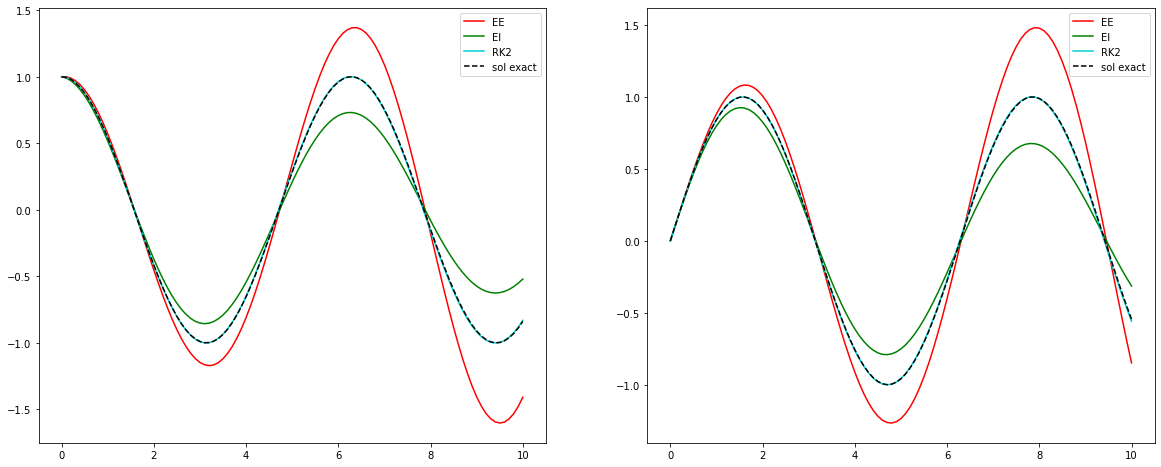

In [11]:
fig , axs = plt.subplots(1,2,figsize = (20,8))

axs[0].plot(temps,X1EE,'r-',label='EE')
axs[0].plot(temps,X1EI,'g-',label='EI')
axs[0].plot(temps,X1RK2,'-',color='darkturquoise',label='RK2')
axs[0].plot(temps,X1solExact,'k--',label='sol exact')
axs[0].legend()


axs[1].plot(temps,X2EE,'r-',label='EE')
axs[1].plot(temps,X2EI,'g-',label='EI')
axs[1].plot(temps,X2RK2,'-',color='darkturquoise',label='RK2')
axs[1].plot(temps,X2solExact,'k--',label='sol exact')
axs[1].legend()

plt.show()

Sans surprise, la solution calculée par la méthode de Runge-Kutta d'ordre 2 est bien la plus efficace puisqu'elle se superpose avec la solution exacte. Pour se le convaincre, calculons les erreurs.

In [12]:
errEE = np.max(np.abs(EE - solExacte)) 
errEI = np.max(np.abs(EI - solExacte)) 
errRK2 = np.max(np.abs(rk2 - solExacte)) 

print(tabulate([["erreur EE","erreur EI","erreur RK2"],[errEE,errEI,errRK2]],tablefmt='fancy_grid'))

╒════════════════════╤════════════════════╤══════════════════════╕
│ erreur EE          │ erreur EI          │ erreur RK2           │
├────────────────────┼────────────────────┼──────────────────────┤
│ 0.6109871334147167 │ 0.3744144750746724 │ 0.015912874998090104 │
╘════════════════════╧════════════════════╧══════════════════════╛


In [13]:
titreY = np.array(["EE","EI","RK2"])
titreX = np.array([["méthode","temps d'exécution"]])


tps = np.array([tpsEE,tpsEI,tpsRK2])

tps = np.stack((titreY,tps))
res = np.concatenate((titreX.T,tps),axis=1)

print(tabulate(res,tablefmt='fancy_grid'))

╒═══════════════════╤══════════════════════╤══════════════════════╤═════════════════════╕
│ méthode           │ EE                   │ EI                   │ RK2                 │
├───────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ temps d'exécution │ 0.007953405380249023 │ 0.009673118591308594 │ 0.01085042953491211 │
╘═══════════════════╧══════════════════════╧══════════════════════╧═════════════════════╛


On peut remarquer que la méthode d'Euler Implicite, bien que très calculatoire, possède un temps d'exécution inférieur à celui de RK2. Cependant RK2 est la méthode la plus précise.

In [14]:
T = 10

x0 = 1.
y0 = 0.
X0 = np.array([x0,y0])

i = 0
TabP = np.zeros((6,3))
TabP[0,:] = None

TabErr = np.zeros((6,3))

M = np.array([[0,-1],[1,0]])

for N in (20,40,80,160,320,640):
    temps = np.linspace(0,T,N+1)
    
    EE = euler_explicite(dynamique1, X0, temps)

    EI = euler_implicite(M, X0, temps)
    
    rk2 = RK2(dynamique1, X0, temps , alpha)
    
    solExacte = X(temps)
    
    errEE = np.max(np.abs(EE - solExacte)) 
    errEI = np.max(np.abs(EI - solExacte)) 
    errRK2 = np.max(np.abs(rk2 - solExacte)) 
    
    TabErr[i,:] = np.array([errEE,errEI,errRK2])
    
    if i > 0 :
        TabP[i,:] = np.log(TabErr[i-1,:] / TabErr[i,:]) / np.log(2)
    
    i+=1

In [15]:
# récupération des erreurs
errEE = TabErr[:,0]
errEI = TabErr[:,1]
errRK2 = TabErr[:,2]

In [16]:
TabP = np.round(TabP)

titre = np.array(["N","err Euler Exp","err Euler Impl","err RK2","p EE","p EI","p RK2"])
tabN = np.array([20,40,80,160,320,640]) 


Tres = np.array([tabN,errEE,errEI,errRK2,TabP[:,0],TabP[:,1],TabP[:,2]]).T

Tres = np.concatenate(([titre],Tres))
print(tabulate(Tres,tablefmt='fancy_grid'))

╒═══════╤═════════════════════╤═════════════════════╤════════════════════════╤══════╤══════╤═══════╕
│ N     │ err Euler Exp       │ err Euler Impl      │ err RK2                │ p EE │ p EI │ p RK2 │
├───────┼─────────────────────┼─────────────────────┼────────────────────────┼──────┼──────┼───────┤
│ 20.0  │ 8.367020351721887   │ 0.8991529485789849  │ 0.41733008741613775    │ nan  │ nan  │ nan   │
├───────┼─────────────────────┼─────────────────────┼────────────────────────┼──────┼──────┼───────┤
│ 40.0  │ 2.2899356037184053  │ 0.6832352109332426  │ 0.10057504058190975    │ 2.0  │ 0.0  │ 2.0   │
├───────┼─────────────────────┼─────────────────────┼────────────────────────┼──────┼──────┼───────┤
│ 80.0  │ 0.8159281444976545  │ 0.4425689641427898  │ 0.024909414367641797   │ 1.0  │ 1.0  │ 2.0   │
├───────┼─────────────────────┼─────────────────────┼────────────────────────┼──────┼──────┼───────┤
│ 160.0 │ 0.34639787399169086 │ 0.25507491820076234 │ 0.006198573631932575   │ 1.0  │ 1.0  

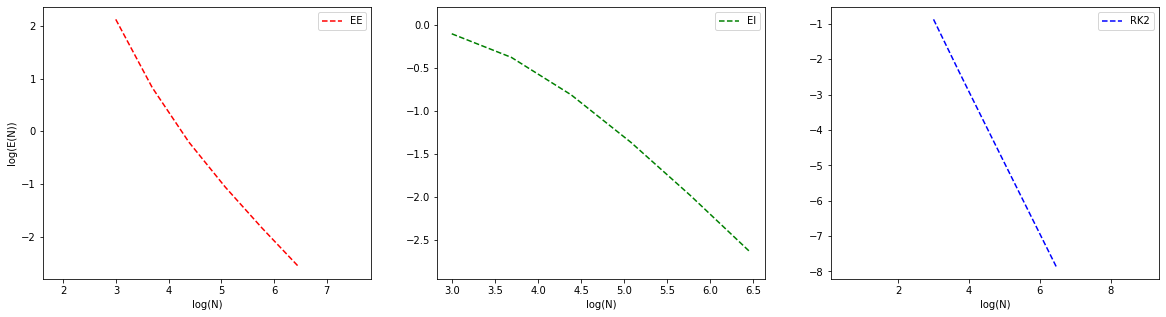

In [17]:
n = np.log(np.array([20,40,80,160,320,640]))

fig , axs = plt.subplots(1,3,figsize = (20,5))


axs[0].plot(n,np.log(errEE),'r--',label='EE')
axs[0].axis('equal')
axs[0].set_ylabel('log(E(N))')
axs[0].set_xlabel('log(N)')
axs[0].legend()

axs[1].plot(n,np.log(errEI),'g--',label='EI')
axs[1].axis('equal')
axs[1].set_xlabel('log(N)')
axs[1].legend()

axs[2].plot(n,np.log(errRK2),'b--',label='RK2')
axs[2].axis('equal')
axs[2].set_xlabel('log(N)')
axs[2].legend()

plt.show()

Les diffèrentes méthodes possèdent chacun leur avantages et inconvénients.  
La méthode de Runge Kutta 2 est bien la plus précise des 3 mais le coût des calculs et bien plus important que la méthode d'Euler Explicite. Cependant ce coût et bien moins important que la méthode d'Euler Implicite qui demande un calcul de matrice à chaque itération.   

## Exercice 2 : Modèle non linéaire

1-
La dynamique $f$ est une fonction de $\mathbb{R}^{2}→\mathbb{R}^{2}$ définie par  
$$
f
\left[\begin{matrix}x_{1}\\
x_{2}
\end{matrix}\right]\rightarrow\left[\begin{matrix}2x_{2}\\
-3x_{1}^{2}-12x_{1}
\end{matrix}\right]
$$

In [18]:
def dynamique2(Y,t):
    x1,x2 = Y
    return np.array([2*x2,-3*x1**2-12*x1])

On test pour $N = 1000$

In [19]:
T = 10
N = 1001
#conditions initiales
x0 = -3.
y0 = 0.

X0 = np.array([x0,y0])

temps = np.linspace(0,T,N+1)

#calcul des solutions 
tps1 = time.time()
EE = euler_explicite(dynamique2, X0, temps)
tps2 = time.time()
tpsEE = tps2 - tps1

tps1 = time.time()
rk2 = RK2(dynamique2, X0, temps, alpha)
tps2 = time.time()
tpsRK2 = tps2 - tps1

tps1 = time.time()
rk4 = RK4(dynamique2, X0, temps)
tps2 = time.time()
tpsRK4 = tps2 - tps1

solExacte = X(temps)

/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: overflow encountered in scalar power
  return np.array([2*x2,-3*x1**2-12*x1])
/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([2*x2,-3*x1**2-12*x1])


Le résultat donné par la méthode d'euler explose car elle ne fait que d'accumuler les erreurs qui deviennent beaucoup trop importante à force de faire des virages.

In [20]:
#récuperation des coordonnées x1 et x2
X1EE = EE[0,:]
X2EE = EE[1,:]

X1RK2 = rk2[0,:]
X2RK2 = rk2[1,:]

X1RK4 = rk4[0,:]
X2RK4 = rk4[1,:]

X1solExact = solExacte[0,:]
X2solExact = solExacte[1,:]

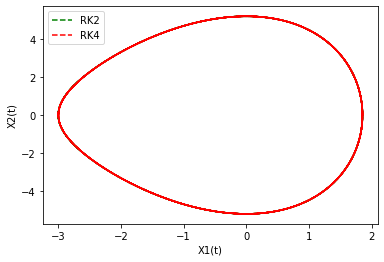

In [21]:
fig, ax = plt.subplots()

ax.plot(X1RK2,X2RK2,'g--',label="RK2")
ax.plot(X1RK4,X2RK4,'r--',label="RK4")
ax.legend(loc='upper left')
ax.set_xlabel("X1(t)")
ax.set_ylabel("X2(t)")
#ax.set_aspect('equal')
plt.show()

Les solutions données par les méthodes RK2 et RK4 sont très proches car leurs courbes sont confondues sur le graphe ci-dessus pour T=10.

In [22]:
titreY = np.array(["EE","RK2","RK4"])
titreX = np.array([["méthode","temps d'exécution"]])


tps = np.array([tpsEE,tpsRK2,tpsRK4])

tps = np.stack((titreY,tps))
res = np.concatenate((titreX.T,tps),axis=1)

print(tabulate(res,tablefmt='fancy_grid'))

╒═══════════════════╤═════════════════════╤═════════════════════╤═════════════════════╕
│ méthode           │ EE                  │ RK2                 │ RK4                 │
├───────────────────┼─────────────────────┼─────────────────────┼─────────────────────┤
│ temps d'exécution │ 0.06512761116027832 │ 0.07838916778564453 │ 0.13486838340759277 │
╘═══════════════════╧═════════════════════╧═════════════════════╧═════════════════════╛


In [23]:
def solExactNL(c0,x):
    return np.sqrt(c0 - x**3-6*x**2),-np.sqrt(c0 - x**3-6*x**2)

In [24]:
c0 = x0**3+6*x0**2+y0**2
x = np.linspace(-3,2,N)
y1,y2 = solExactNL(c0,x)

/tmp/ipykernel_15182/3821159040.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(c0 - x**3-6*x**2),-np.sqrt(c0 - x**3-6*x**2)


Cela provoque des NaN car la racine n'est pas définie, l'intervalle est trop large. Il faut trouver les racines de la fonction f (solExactNL) et faire un intervalle où les bords sont les racines. 

In [25]:
# méthode de la bissection pour trouver les racines
def bissection(f,a,b,epsilon) :
    while(np.abs(b-a) > epsilon) :
        m = (a+b)*0.5
        if (f(a)*f(m)>0) :
            a = m
        else :
            b = m
            
    return a

In [26]:
def f(x):
    return -x**3-6*x**2+c0

In [27]:
r1 = bissection(f,-3.5,-2.7,10e-15)
r2 = bissection(f,1.6,1.9,10e-15)

on rétrécit un peu l'intervale pour ne pas provoquer l'erreur

In [28]:
x = np.linspace(r1+10e-5,r2-10e-5,N)
y1,y2 = solExactNL(c0,x)

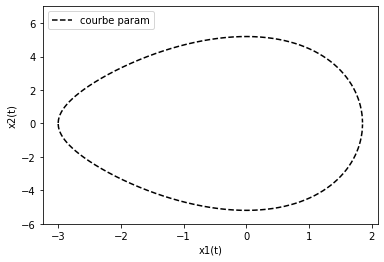

In [29]:
#plt.plot(X1RK4,X2RK4,color='darkturquoise',label='RK4')
plt.plot(x,y1,'k--',label='courbe param')
plt.plot(x,y2,'k--')


plt.ylim([-6,7])
plt.legend(loc='upper left')
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.show()

/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: overflow encountered in scalar power
  return np.array([2*x2,-3*x1**2-12*x1])
/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([2*x2,-3*x1**2-12*x1])


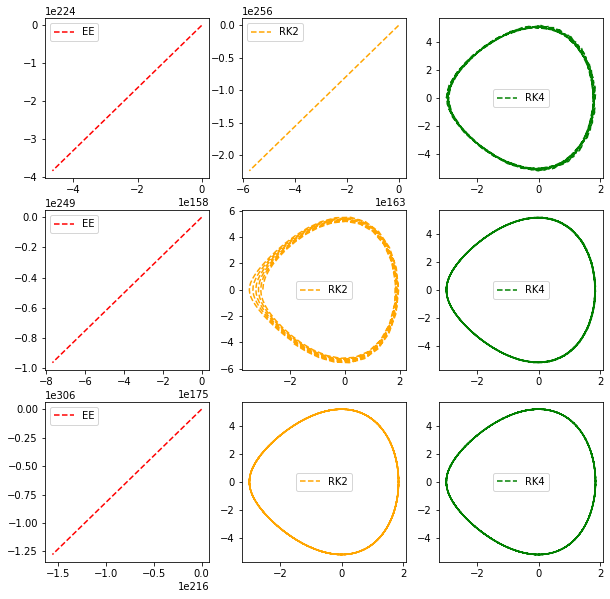

In [30]:
x0 = -3.
y0 = 0.
X0 = np.array([x0,y0])
fig, axs = plt.subplots(3,3,figsize=(10,10))
i = 0
for N in (101,201,1001):
    temps = np.linspace(0,T,N+1)
    
    EE = euler_explicite(dynamique2, X0, temps)
    rk2 = RK2(dynamique2, X0, temps, alpha)
    rk4 = RK4(dynamique2, X0, temps)
    
    X1EE = EE[0,:]
    X2EE = EE[1,:]

    X1RK2 = rk2[0,:]
    X2RK2 = rk2[1,:]

    X1RK4 = rk4[0,:]
    X2RK4 = rk4[1,:]
    
    axs[i,0].plot(X1EE,X2EE,'r--',label="EE")
    axs[i,0].legend()

    axs[i,1].plot(X1RK2,X2RK2,'--',color='orange',label="RK2")
    axs[i,1].legend()

    axs[i,2].plot(X1RK4,X2RK4,'g--',label="RK4")
    axs[i,2].legend()
    
    i+=1

À partir de ces graphes on se rend bien compte que euler implicite, même pour N grand donne des résultats abberrants. La méthode est de loin la moins précise des 3. Ensuite comme on pouvait s'y attendre, on obtient de meilleure résultat avec des méthodes de Runge-Kutta d'ordre 2 et 4. On se rend bien compte que RK4 est plus précise, surtout lorsque N est petit, cependant on arrive tout de même à obtenir des résultats satisfaisant avec RK2 quand N devient plus grand. Les tests on ici été réalisé avec T = 10, car prendre T = 100 donne des résultats bien plus mauvais pour les 3 méthodes, puisque les erreurs se propagent petit à petit, et il est alors difficile de les comparer. Cependant voici ci-dessous ce que l'on obtient avec T = 100 : 

/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: overflow encountered in scalar power
  return np.array([2*x2,-3*x1**2-12*x1])
/tmp/ipykernel_15182/3423271242.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([2*x2,-3*x1**2-12*x1])


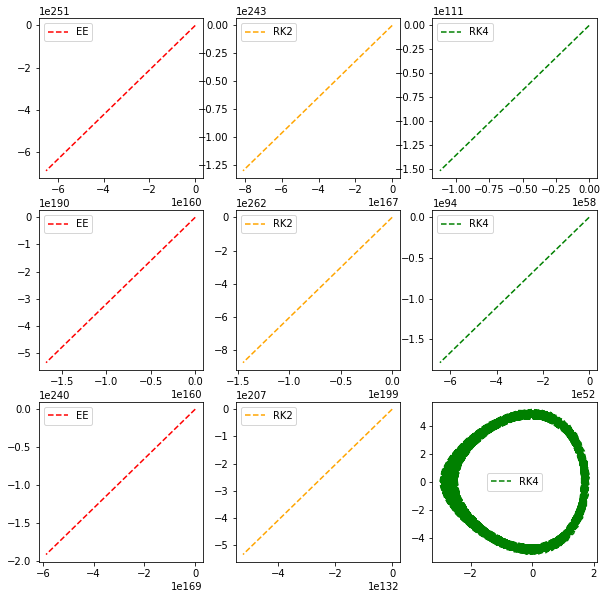

In [31]:
T = 100
x0 = -3.
y0 = 0.
X0 = np.array([x0,y0])
fig, axs = plt.subplots(3,3,figsize=(10,10))
i = 0
for N in (101,201,1001):
    temps = np.linspace(0,T,N+1)
    EE = euler_explicite(dynamique2, X0, temps)
    rk2 = RK2(dynamique2, X0, temps, alpha)
    rk4 = RK4(dynamique2, X0, temps)
    
    X1EE = EE[0,:]
    X2EE = EE[1,:]

    X1RK2 = rk2[0,:]
    X2RK2 = rk2[1,:]

    X1RK4 = rk4[0,:]
    X2RK4 = rk4[1,:]
    
    axs[i,0].plot(X1EE,X2EE,'r--',label="EE")
    axs[i,0].legend()

    
    axs[i,1].plot(X1RK2,X2RK2,'--',color='orange',label="RK2")
    axs[i,1].legend()
    
    axs[i,2].plot(X1RK4,X2RK4,'g--',label="RK4")
    axs[i,2].legend()
    
    i+=1

On remarque que seul la méthode RK4 pour N=1001 donne un résultat relativement cohérent car pour les autres méthodes, avec un T aussi grand les erreurs semblent s'accumuler et cela mène à un résultat n'ayant plus de sens. Bien qu'ayant un coup de calcul plus important, RK4 semble être la méthode la plus précise et la plus stable numériquement car même avec un temps relativement grand (T=100), nous sommes parvenu en prenant N grand à obtenir un résultat ne s'éloignant pas trop de la solution exacte. 